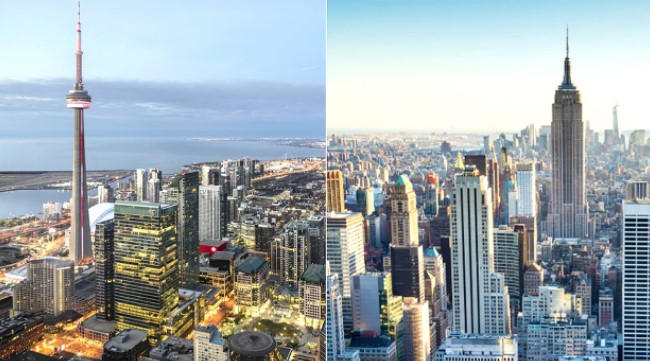

# <center>The battle of neighborhoods - office in Toronto</center>

## 1. Introduction.

### 1.1 Background

As reported by Wikipedia, New York is the most populous city in the United States <a href='#1'>[1]</a>. Its population in 2020  was estimated as 8,253,213 people. What is important New York City is also the most densely populated major city in the United State (more than 27 thousand people per square kilometer). As one of the most important cities of the United States and even the whole world, New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports.


The second, undoubtedly interesting city in North America, is Toronto. Toronto is the capital city of the Canadian province of Ontario. As Wikipedia says <a href='#2'>[2]</a> with a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. Toronto is a prominent centre for music, theatre, motion picture production, and television production. Its varied cultural institutions with numerous museums and galleries, festivals and public events, entertainment districts, national historic sites, and sports activities.


As we can see from this encyclopaedic review, both cities are quite large and have many common features. The common features of both cities certainly include <a href='#3'>[3]</a>:


* Both are the biggest cities in their respective countries.
* Both are the financial capitals in their respective countries.
* Both are the most crowded cities in their respective countries.
* Both cities have similar weather.
* Both cities are safe.
* Both cities are entertainment centers and big on the arts.


However, according to ranking Best Places to Live in North America <a href='#4'>[4]</a> Toronto seems to be better place to live - in the mentioned ranking Toronto is ranked on the first place, while New York is eighteenth.

### 1.2 Problem

My client, Data-X Co., is considering relocating its business from today's location in New York to Toronto. He confirmed the fact that most of its employees have expressed such a desire (will move to Toronto with the company). Generally, all believe that with all the similarities between cities, Toronto is a bit less crowded and will be easier to maintain a work-life balance. As everyone appreciated the previous location in terms of available attractions the client wants to move the office to similar, nice place if it is possible.


The problem comes down to answering the question:


**Where would I recommend to open the new office taking into account similarity of the new and old location (venues availability)?**


### 1.3 Interest

In the era of high mobility of employees, striving to improve the quality of life by employees, looking for work-life balance but also seeking lower costs of running a business, finding the answer on asked question can be interesting for  a large group of entrepreneurs who want to move their headquarters to other countries or open new offices in new location with certain factors unchanging.


## 2. Data



### 2.1 Data sources

For the project I will use the following data:

* <p>Toronto City data that contains Borough, Neighborhoods</p> 
	<p><strong>Data Source:</strong> <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">Wikipedia</a></p>
	<strong>Description:</strong> The Wikipedia site contain all the information I need to explore and cluster the neighbourhoods in Toronto. I will scrape the Wikipedia page using pandas package,  clean it, and then read it into a pandas data frame.


* <p>Geographical Location data using Geocoder Package</p>
	<p><strong>Data Source:</strong></p> 
		<p>for API: <a href="https://cocl.us/Geospatial_data">https://cocl.us/Geospatial_data</a></p> 
		<p>for latitudes and longitudes of Toronto: <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv">Geospatial_Coordinates.csv</a>
    </p>
	<p><strong>Description:</strong> The second source of data was provided with the Geographical coordinates of the neighbourhoods with the Postal Codes of Toronto. I will combine the above data with latitudes and longitudes of Toronto's neighbourhoods.</p>

* <p>New York data that contains Borough, Neighbourhoods, latitude and longitude</p>
	<p><strong>Data Source:</strong> <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"> newyork_data.json</a></p>
    <strong>Description:</strong> The third source of data was provided with the Geographical coordinates of the neighbourhoods of NY. I will transform the json file into pandas data frame. Both data (NY and Toronto) I will use to find venues of each locations.


* <p>Venue Data using Foursquare API
	<p><strong>Data Source:</strong> <a href="https://foursquare.com/developers/apps">https://foursquare.com/developers/apps</a></p>
	<strong>Description:</strong> From Foursquare API we can get the name, category, latitude, longitude for each venue. Then  I will this feature to group the neighbourhoods into clusters. I will use the k-means clustering algorithm to complete the task. Finally, I will also use the Folium library to visualize the neighbourhoods in Toronto and their emerging clusters.


### 2.2 Data cleaning

#### 2.2.1 Downloading and Exploring Toronto Dataset

To download the data from Wikipedia I use pandas library.
First, let's import needed libraries and conect to url: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [33]:
#First I will import all basic packages and download the Wikipedia page

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_toronto = pd.read_html(url)

Libraries imported.


Object df_toronto is a list with lenght 3:

In [2]:
print('Object type ',type(df_toronto))
print('Object lenght ', len(df_toronto))

Object type  <class 'list'>
Object lenght  3


The table I'm interested in is the first table:

In [4]:
df_toronto[0].head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


Let's check the shape of the frame:

In [5]:
df_toronto[0].shape

(20, 9)

My target table will be constructed from df_toronto[0] by reading each column and concatenate it below existing one.

In [6]:
#creation of pandas dataframe with first coulmn of df_toronto[0]
df_onecolumn = pd.DataFrame(df_toronto[0][0])
#giving a name to column
df_onecolumn.columns =['One_column']
#reading and concatenating next columns
for i in range(1,9):
    dfx=pd.DataFrame(df_toronto[0][i])
    dfx.columns =['One_column']
    #dfx.reset_index(drop=True, inplace=True)
    df_onecolumn = pd.concat([df_onecolumn, dfx], ignore_index=True)
df_onecolumn

,One_column
0,M1ANot assigned
1,M1BScarborough(Malvern / Rouge)
2,M1CScarborough(Rouge Hill / Port Union / Highl...
3,M1EScarborough(Guildwood / Morningside / West ...
4,M1GScarborough(Woburn)
...,...
175,M9VEtobicoke(South Steeles / Silverstone / Hum...
176,M9WEtobicokeNorthwest(Clairville / Humberwood ...
177,M9XNot assigned
178,M9YNot assigned


Let's create all needed columns:

In [7]:
df_onecolumn["Postal Code"] = np.nan
df_onecolumn["Delete"] = np.nan
df_onecolumn["Borough"] = np.nan
df_onecolumn["Neighborhood"] = np.nan

Now I will fulfill all columns with proper data from column named 'One_column':

In [8]:
#Fulfilling Postal Code column with 3 first characters from One_column
for i in range(180):
    postal_code=df_onecolumn.loc[i,'One_column']
    df_onecolumn.loc[i,"Postal Code"]=postal_code[:3]
    
#Fulfilling Delete column with 15 next chatacters from One_colum. 
#The column Delet will be used to delete all "Not assigned" codes. 
    delete_column=df_onecolumn.loc[i,'One_column']
    df_onecolumn.loc[i,"Delete"]=delete_column[3:15]

df_onecolumn = df_onecolumn[df_onecolumn['Delete'] != 'Not assigned']

df_onecolumn=df_onecolumn.reset_index()
df_onecolumn = df_onecolumn.drop(['index'], axis=1)

for i in range(df_onecolumn.shape[0]):
    #print(i)
    a=df_onecolumn.loc[i,'One_column']
    #print(a)
    a=a[3:]
    #print(a)
    b=a.split("(")[1]
    #print(b)
    a=a.split("(")[0]
    #print(a)
    df_onecolumn.loc[i,"Borough"]=a
    df_onecolumn.loc[i,"Neighborhood"]=b

df_onecolumn = df_onecolumn.drop(['Delete'], axis=1)

for i in range(df_onecolumn.shape[0]):
    a=df_onecolumn.loc[i,'Neighborhood']
    a=a.split(")")[0]
    a=a.replace(" / ",", ")
    
    df_onecolumn.loc[i,"Neighborhood"]=a

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

Let's see the result of the prevous actions:

In [11]:
df_onecolumn.head()

,One_column,Postal Code,Borough,Neighborhood
0,M1BScarborough(Malvern / Rouge),M1B,Scarborough,"Malvern, Rouge"
1,M1CScarborough(Rouge Hill / Port Union / Highl...,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1EScarborough(Guildwood / Morningside / West ...,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1GScarborough(Woburn),M1G,Scarborough,Woburn
4,M1HScarborough(Cedarbrae),M1H,Scarborough,Cedarbrae


Just to be sure that everything went fine, I like to export dataframe to csv file and analyze it.

In [13]:
df_onecolumn.to_csv(r'D:\GitHub\Coursera_Capstone\final_reports\data\df_onecolumn.csv', header=None, index=None, sep=';', mode='a')

In the file I saw that 5 rows have not very nice text in Borough column and should be modify:

In [14]:
options = ['M4J','M5W','M7R','M7Y','M9W']
df_onecolumn[df_onecolumn['Postal Code'].isin(options)]

,One_column,Postal Code,Borough,Neighborhood
40,M4JEast YorkEast Toronto(The Danforth East),M4J,East YorkEast Toronto,The Danforth East
69,M5WDowntown TorontoStn A PO Boxes25 The Esplan...,M5W,Downtown TorontoStn A PO Boxes25 The Esplanade,Enclave of M5E
86,M7RMississaugaCanada Post Gateway Processing C...,M7R,MississaugaCanada Post Gateway Processing Centre,Enclave of L4W
87,M7YEast TorontoBusiness reply mail Processing ...,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
102,M9WEtobicokeNorthwest(Clairville / Humberwood ...,M9W,EtobicokeNorthwest,"Clairville, Humberwood, Woodbine Downs, West H..."


In the code below I will:
* add the space between East York and East Toronto for M4J
* change Borough and Neighborhood to Downtown Toronto for M5W
* change Borough and Neighborhood to Mississauga for M5W
* change Borough and Neighborhood to East Toronto for M7Y
* add the space between Etobicoke and Northwest for M9W
* delete One_column

In [15]:
a = df_onecolumn.loc[40,'Borough']
a=a.replace("YorkEast","York East")
df_onecolumn.loc[40,'Borough']=a

a='Downtown Toronto'
df_onecolumn.loc[69,'Borough']=a
df_onecolumn.loc[69,'Neighborhood']=a

a='Mississauga'
df_onecolumn.loc[86,'Borough']=a
df_onecolumn.loc[86,'Neighborhood']=a

a='East Toronto'
df_onecolumn.loc[87,'Borough']=a
df_onecolumn.loc[87,'Neighborhood']=a

a = df_onecolumn.loc[102,'Borough']
a=a.replace("EtobicokeNorthwest","Etobicoke Northwest")
df_onecolumn.loc[102,'Borough']=a

df_onecolumn = df_onecolumn.drop(['One_column'], axis=1)

df_onecolumn

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Let's see again the lines mentioned abow:

In [16]:
options = ['M4J','M5W','M7R','M7Y','M9W']
df_onecolumn[df_onecolumn['Postal Code'].isin(options)]

,Postal Code,Borough,Neighborhood
40,M4J,East York East Toronto,The Danforth East
69,M5W,Downtown Toronto,Downtown Toronto
86,M7R,Mississauga,Mississauga
87,M7Y,East Toronto,East Toronto
102,M9W,Etobicoke Northwest,"Clairville, Humberwood, Woodbine Downs, West H..."


df_onecolumn was my working dataframe that's why I will create the final table named df_Toronto:

In [17]:
df_Toronto = df_onecolumn

In [18]:
df_Toronto.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Now I will save the df_Toronto locally:

In [20]:
df_Toronto.to_csv(r'D:\GitHub\Coursera_Capstone\final_reports\data\df_Toronto.csv', header=None, index=None, sep=';', mode='a')

Now, in the next fiew lines of code I will join neighborhood table with latitude and longitude information provided within the project.

First I will create a dataframe of the latitude and longitudes of the Toronto Neighborhoods from the file provided by Coursera

In [21]:
df_coordinates = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Now let's add column Latitude and Longitude to the table df_Toronto

In [22]:
df_Toronto.set_index("Postal Code")
df_coordinates.set_index("Postal Code")
df_Toronto=pd.merge(df_Toronto, df_coordinates)
df_Toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [23]:
df_Toronto.to_csv(r'D:\GitHub\Coursera_Capstone\final_reports\data\df_Toronto2.csv', header=None, index=None, sep=';', mode='a')

In [24]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Toronto['Borough'].unique()),
        df_Toronto.shape[0]
    )
)

The dataframe has 13 boroughs and 103 neighborhoods.


I will use now geopy library to get the latitude and longitude values of Toronto.

In [9]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [25]:
import geopy
from geopy.geocoders import Nominatim
import requests # library to handle requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library

In [26]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Toronto&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)')))

Create a map of Toronto with neighborhoods superimposed on top.

In [27]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

NameError: name 'latitude' is not defined

Let's define Foursquare Credentials:

In [28]:
CLIENT_ID = 'FSMODMJOHONN25W1K2ARWFTBUYQCUFGFRWVD0N5KQ1L4U0IE' # your Foursquare ID
CLIENT_SECRET = 'V04RUN5XDJ4HF0QOIPTVGB2GG2LLO2FHGNBPZOLXVW1RYYC4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FSMODMJOHONN25W1K2ARWFTBUYQCUFGFRWVD0N5KQ1L4U0IE
CLIENT_SECRET:V04RUN5XDJ4HF0QOIPTVGB2GG2LLO2FHGNBPZOLXVW1RYYC4


Let's explore the first neighborhood in our dataframe.

Let's create a function to repeat the same process to all the neighborhoods in Toronto as we did it for New York during exercise.

In [ ]:
 def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

 Let's check the size of the resulting dataframe

In [ ]:
print(Toronto_venues.shape)
Toronto_venues.head()

Let's check how many venues were returned for each neighborhood

In [ ]:
Toronto_venues.groupby('Neighborhood').count()

Let's find out how many unique categories can be curated from all the returned venues


In [ ]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

Let's stop here and start to work on the New York data.

In [34]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [35]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


<p><a id=1>[1] https://en.wikipedia.org/wiki/New_York_City </a></p>
<p><a id=2>[2] https://en.wikipedia.org/wiki/Toronto </a></p>
<p><a id=3>[3] https://www.quora.com/How-different-or-similar-is-Toronto-to-New-York-City </a></p>
<p><a id=4>[4] https://nomadlist.com/north-america</a></p>